In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [42]:
df = pd.read_csv('./dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,legitimate


In [43]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [44]:
urls = df.url
df = df.drop('url',axis=1)

In [45]:
urls

0                    http://www.crestonwood.com/router.php
1        http://shadetreetechnology.com/V4/validation/a...
2        https://support-appleld.com.secureupdate.duila...
3                                       http://rgipt.ac.in
4        http://www.iracing.com/tracks/gateway-motorspo...
5                         http://appleid.apple.com-app.es/
6                                      http://www.mutuo.it
7        http://www.shadetreetechnology.com/V4/validati...
8               http://vamoaestudiarmedicina.blogspot.com/
9        https://parade.com/425836/joshwigler/the-amazi...
10       https://www.astrologyonline.eu/Astro_MemoNew/P...
11             https://www.lifewire.com/tcp-port-21-818146
12       https://technofizi.net/top-best-mp3-downloader...
13                         http://html.house/l7ceeid6.html
14                               https://www.missfiga.com/
15       http://wave.progressfilm.co.uk/time3/?logon=my...
16                         https://www.chiefarchitect.co

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11430 non-null  int64  
 1   length_hostname             11430 non-null  int64  
 2   ip                          11430 non-null  int64  
 3   nb_dots                     11430 non-null  int64  
 4   nb_hyphens                  11430 non-null  int64  
 5   nb_at                       11430 non-null  int64  
 6   nb_qm                       11430 non-null  int64  
 7   nb_and                      11430 non-null  int64  
 8   nb_or                       11430 non-null  int64  
 9   nb_eq                       11430 non-null  int64  
 10  nb_underscore               11430 non-null  int64  
 11  nb_tilde                    11430 non-null  int64  
 12  nb_percent                  11430 non-null  int64  
 13  nb_slash                    114

In [47]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.00000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,0.322660,0.006649,0.123097,4.289589,0.000700,1.027909,0.004024,0.062292,0.001925,0.034821,0.448469,0.127997,0.006562,0.016710,0.610936,0.053137,0.025024,0.000350,0.002362,0.065617,0.050131,0.021610,2.231671,0.202450,0.083290,0.123447,0.000175,0.498250,0.003150,6.232808,2.927472,3.127297,5.019773,2.398950,15.393876,10.467979,10.561505,7.258882,7.678075,5.092425,0.327734,0.104199,0.004112,0.004899,0.017935,0.059755,87.189764,0.602457,0.276720,0.0,0.784864,0.0,0.158926,0.0,0.062469,0.063605,0.442170,51.978211,0.0,42.870444,23.236293,0.0,0.001312,0.006037,37.063922,0.001137,0.00140,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,1.093336,0.081274,1.466450,1.882251,0.026448,0.240325,0.103240,0.598190,0.077111,0.375576,0.501912,0.379008,0.080742,0.169358,0.487559,0.089363,0.093422,0.018705,0.048547,0.247622,0.218225,0.145412,0.637069,0.401843,0.276332,0.328964,0.013227,0.691907,0.056035,5.572355,4.768936,2.211571,3.941580,2.997809,22.083644,4.932015,23.077883,4.145827,3.578435,7.147050,0.842600,0.305533,0.063996,0.069827,0.132722,0.331266,166.758254,0.376474,0.319958,0.0,2.758802,0.0,0.266437,0.0,0.156209,0.244058,0.496666,41.523144,0.0,46.249897,38.386577,0.0,0.036204,0.077465,39.073385,0.033707,0.03739,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000

In [48]:
df = df.drop(['nb_or','ratio_nullHyperlinks','ratio_intRedirection','ratio_intErrors','submit_email','sfh'],axis=1)

In [49]:
df.shape

(11430, 82)

In [50]:
df['status'] = LabelEncoder().fit_transform(df['status'])
df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,nb_extCSS,ratio_extRedirection,ratio_extErrors,login_form,external_favicon,links_in_tags,ratio_intMedia,ratio_extMedia,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0.875000,0.500000,0,0,80.000000,100.000000,0.000000,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0.000000,0.000000,0,0,100.000000,80.000000,20.000000,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0.000000,0.000000,0,0,100.000000,0.000000,0.000000,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0.250000,0.250000,0,0,100.000000,96.428571,3.571429,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0.537037,0.018519,1,0,76.470588,0.000000,100.000000,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,0


<AxesSubplot: >

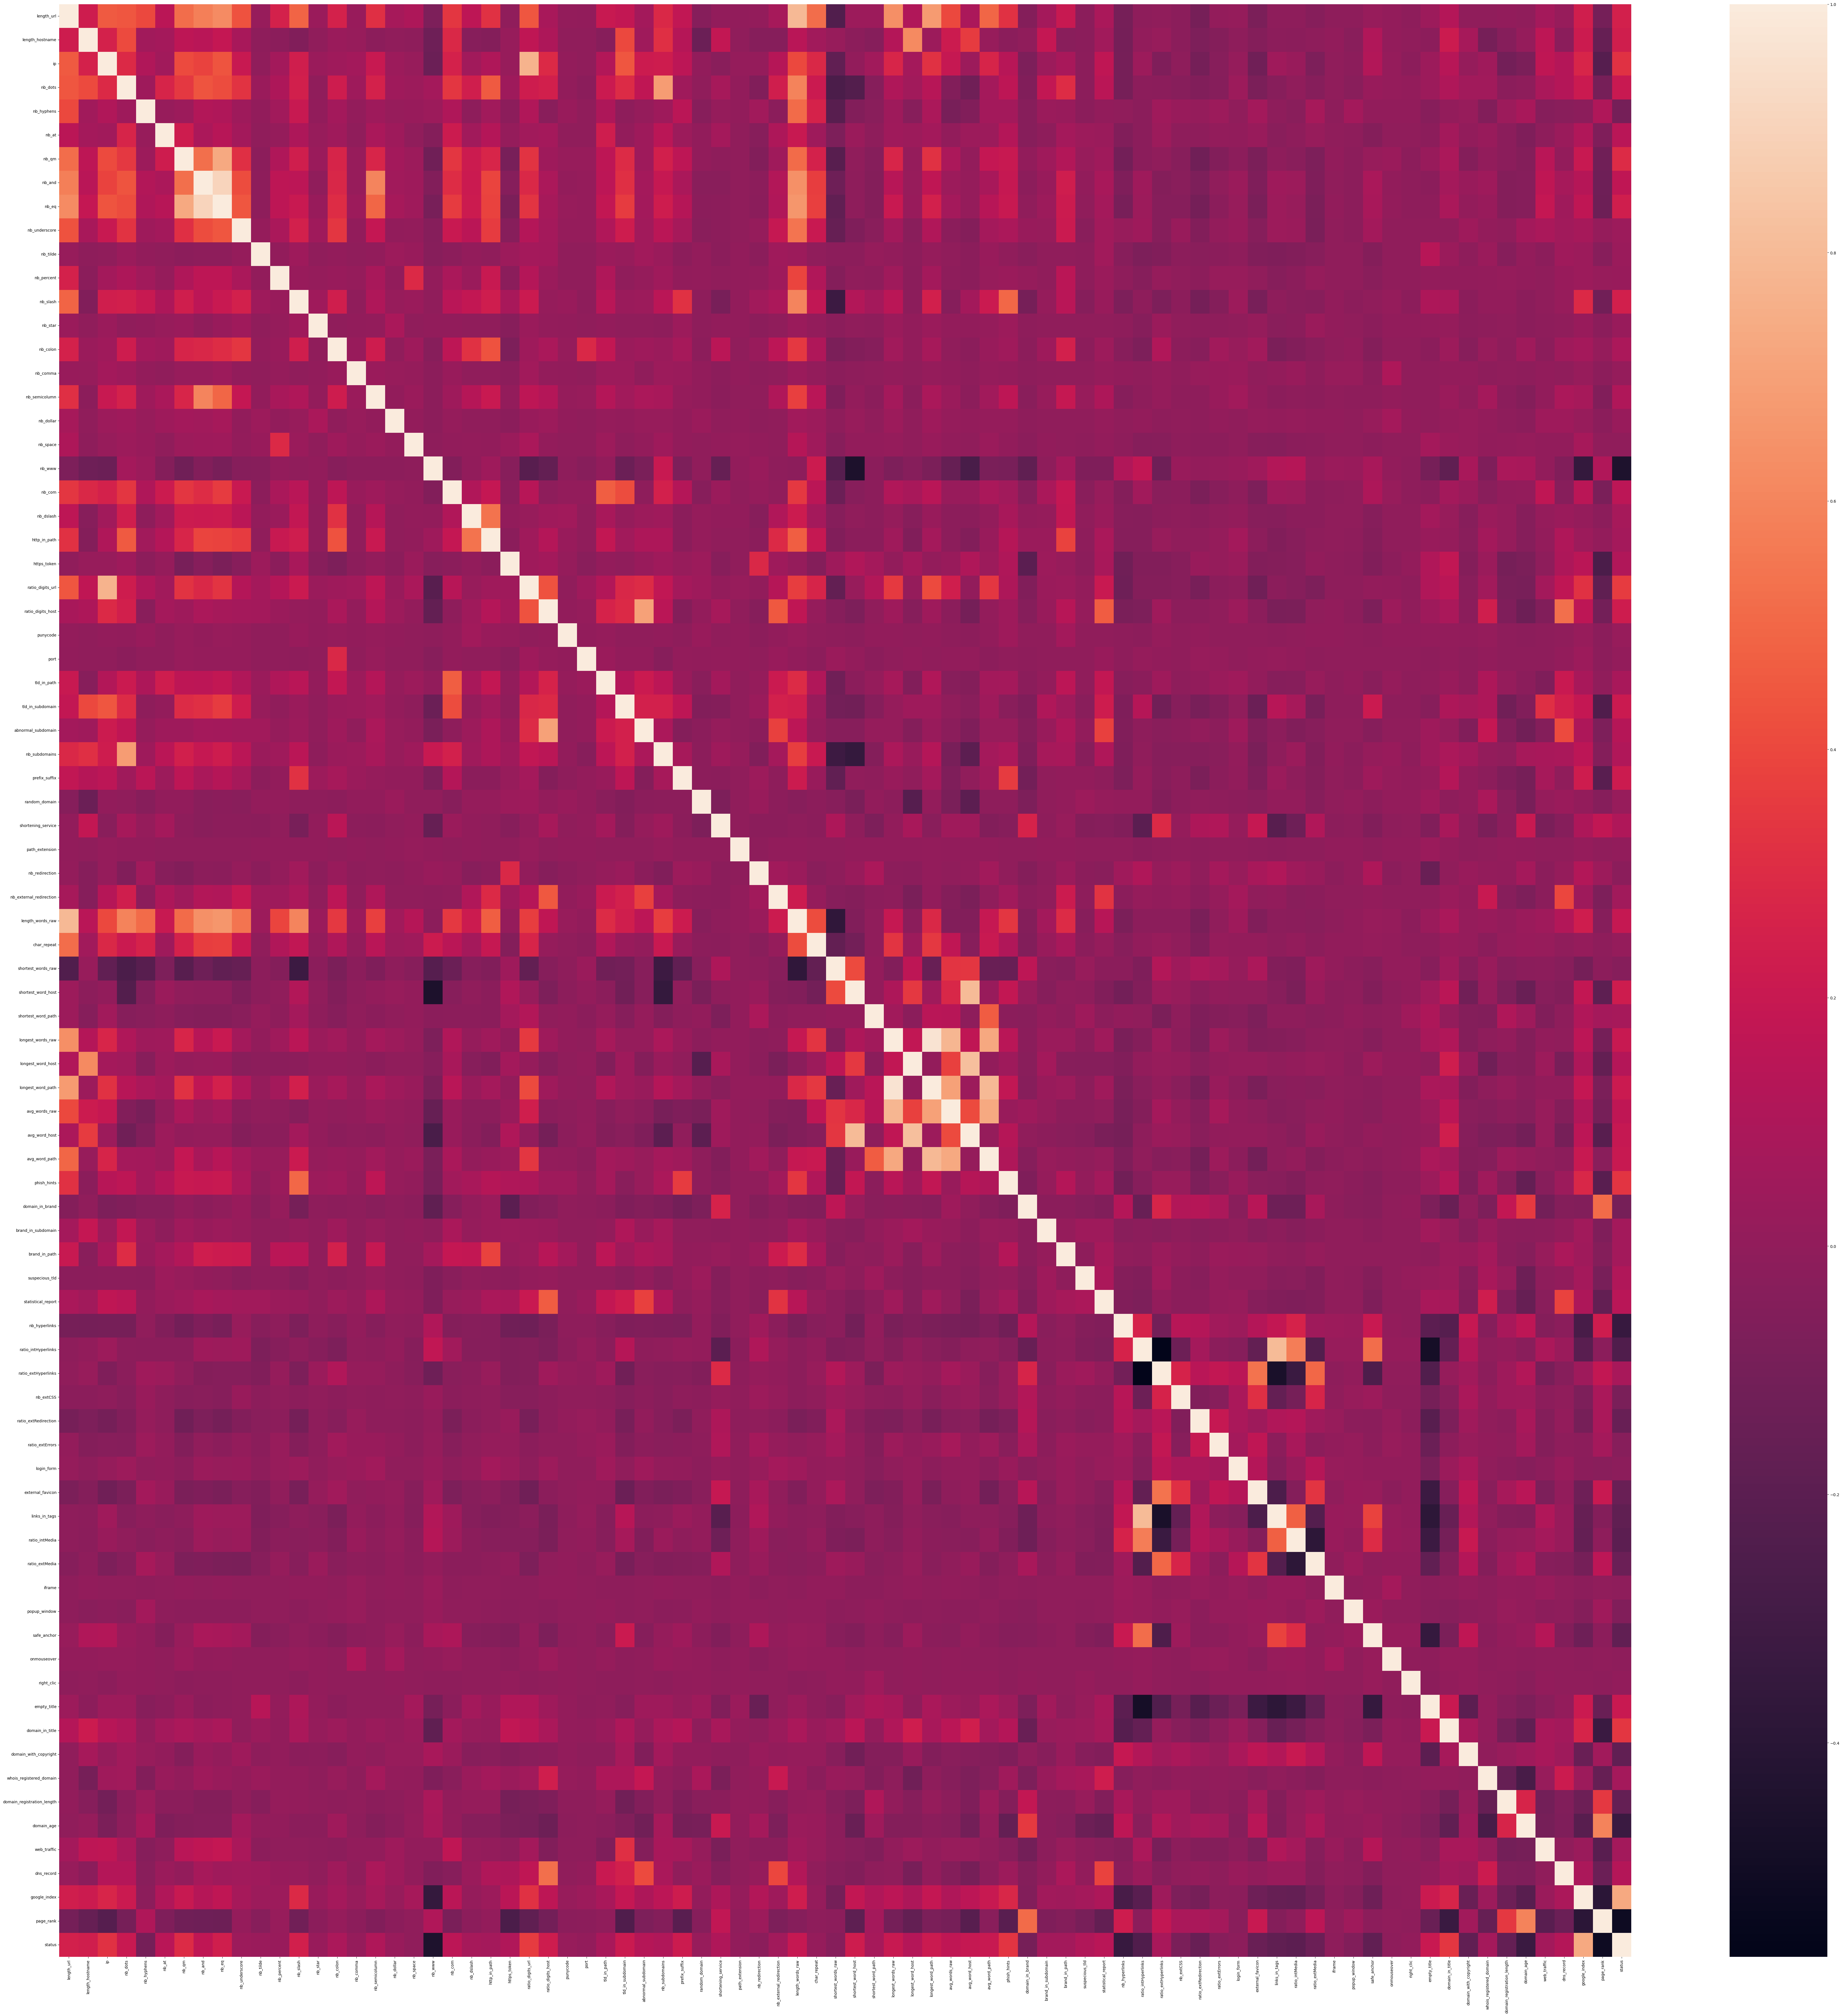

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(90,90))
corr = df.corr()
sns.heatmap(corr)

In [52]:
c = corr[(corr['status'] > 0.2) | (corr['status'] < -0.2)]

In [53]:
c['status'].sort_values()

page_rank             -0.511137
nb_www                -0.443468
nb_hyperlinks         -0.342628
domain_age            -0.331889
ratio_intHyperlinks   -0.243982
longest_words_raw      0.200147
nb_dots                0.207029
empty_title            0.207043
tld_in_subdomain       0.208884
longest_word_path      0.212709
prefix_suffix          0.214681
shortest_word_host     0.223084
ratio_digits_host      0.224335
nb_eq                  0.233386
length_hostname        0.238322
nb_slash               0.242270
length_url             0.248580
nb_qm                  0.294319
ip                     0.321698
phish_hints            0.335393
domain_in_title        0.342807
ratio_digits_url       0.356395
google_index           0.731171
status                 1.000000
Name: status, dtype: float64

In [35]:
df1 = df[['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_qm', 'nb_and',
       'nb_eq', 'nb_slash', 'nb_www', 'nb_com', 'ratio_digits_url',
       'ratio_digits_host', 'tld_in_subdomain', 'prefix_suffix',
       'length_words_raw', 'shortest_word_host', 'longest_words_raw',
       'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path',
       'phish_hints', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'ratio_extRedirection', 'links_in_tags', 'ratio_intMedia',
       'safe_anchor', 'empty_title', 'domain_in_title',
       'domain_with_copyright', 'domain_registration_length', 'domain_age',
       'google_index', 'page_rank']]
df1.head()

,length_url,length_hostname,ip,nb_dots,nb_qm,nb_and,nb_eq,nb_slash,nb_www,nb_com,ratio_digits_url,ratio_digits_host,tld_in_subdomain,prefix_suffix,length_words_raw,shortest_word_host,longest_words_raw,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,nb_hyperlinks,ratio_intHyperlinks,ratio_extRedirection,links_in_tags,ratio_intMedia,safe_anchor,empty_title,domain_in_title,domain_with_copyright,domain_registration_length,domain_age,google_index,page_rank
0,37,19,0,3,0,0,0,3,1,0,0.000000,0.0,0,0,4,3,11,6,5.750000,7.0,4.500000,0,17,0.529412,0.875000,80.000000,100.000000,0.0,0,0,1,45,-1,1,4
1,77,23,1,1,0,0,0,5,0,0,0.220779,0.0,0,0,4,19,32,32,15.750000,19.0,14.666667,0,30,0.966667,0.000000,100.000000,80.000000,100.0,0,1,0,77,5767,1,2
2,126,50,1,4,1,2,3,5,0,1,0.150794,0.0,1,1,12,3,17,17,8.250000,8.4,8.142857,0,4,1.000000,0.000000,100.000000,0.000000,100.0,0,1,0,14,4004,1,0
3,18,11,0,2,0,0,0,2,0,0,0.000000,0.0,0,0,1,5,5,0,5.000000,5.0,0.000000,0,149,0.973154,0.250000,100.000000,96.428571,62.5,0,1,0,62,-1,0,3
4,55,15,0,2,0,0,0,5,1,0,0.000000,0.0,0,0,6,3,11,11,6.333333,5.0,7.000000,0,102,0.470588,0.537037,76.470588,0.000000,0.0,0,0,1,224,8175,0,6


<AxesSubplot: >

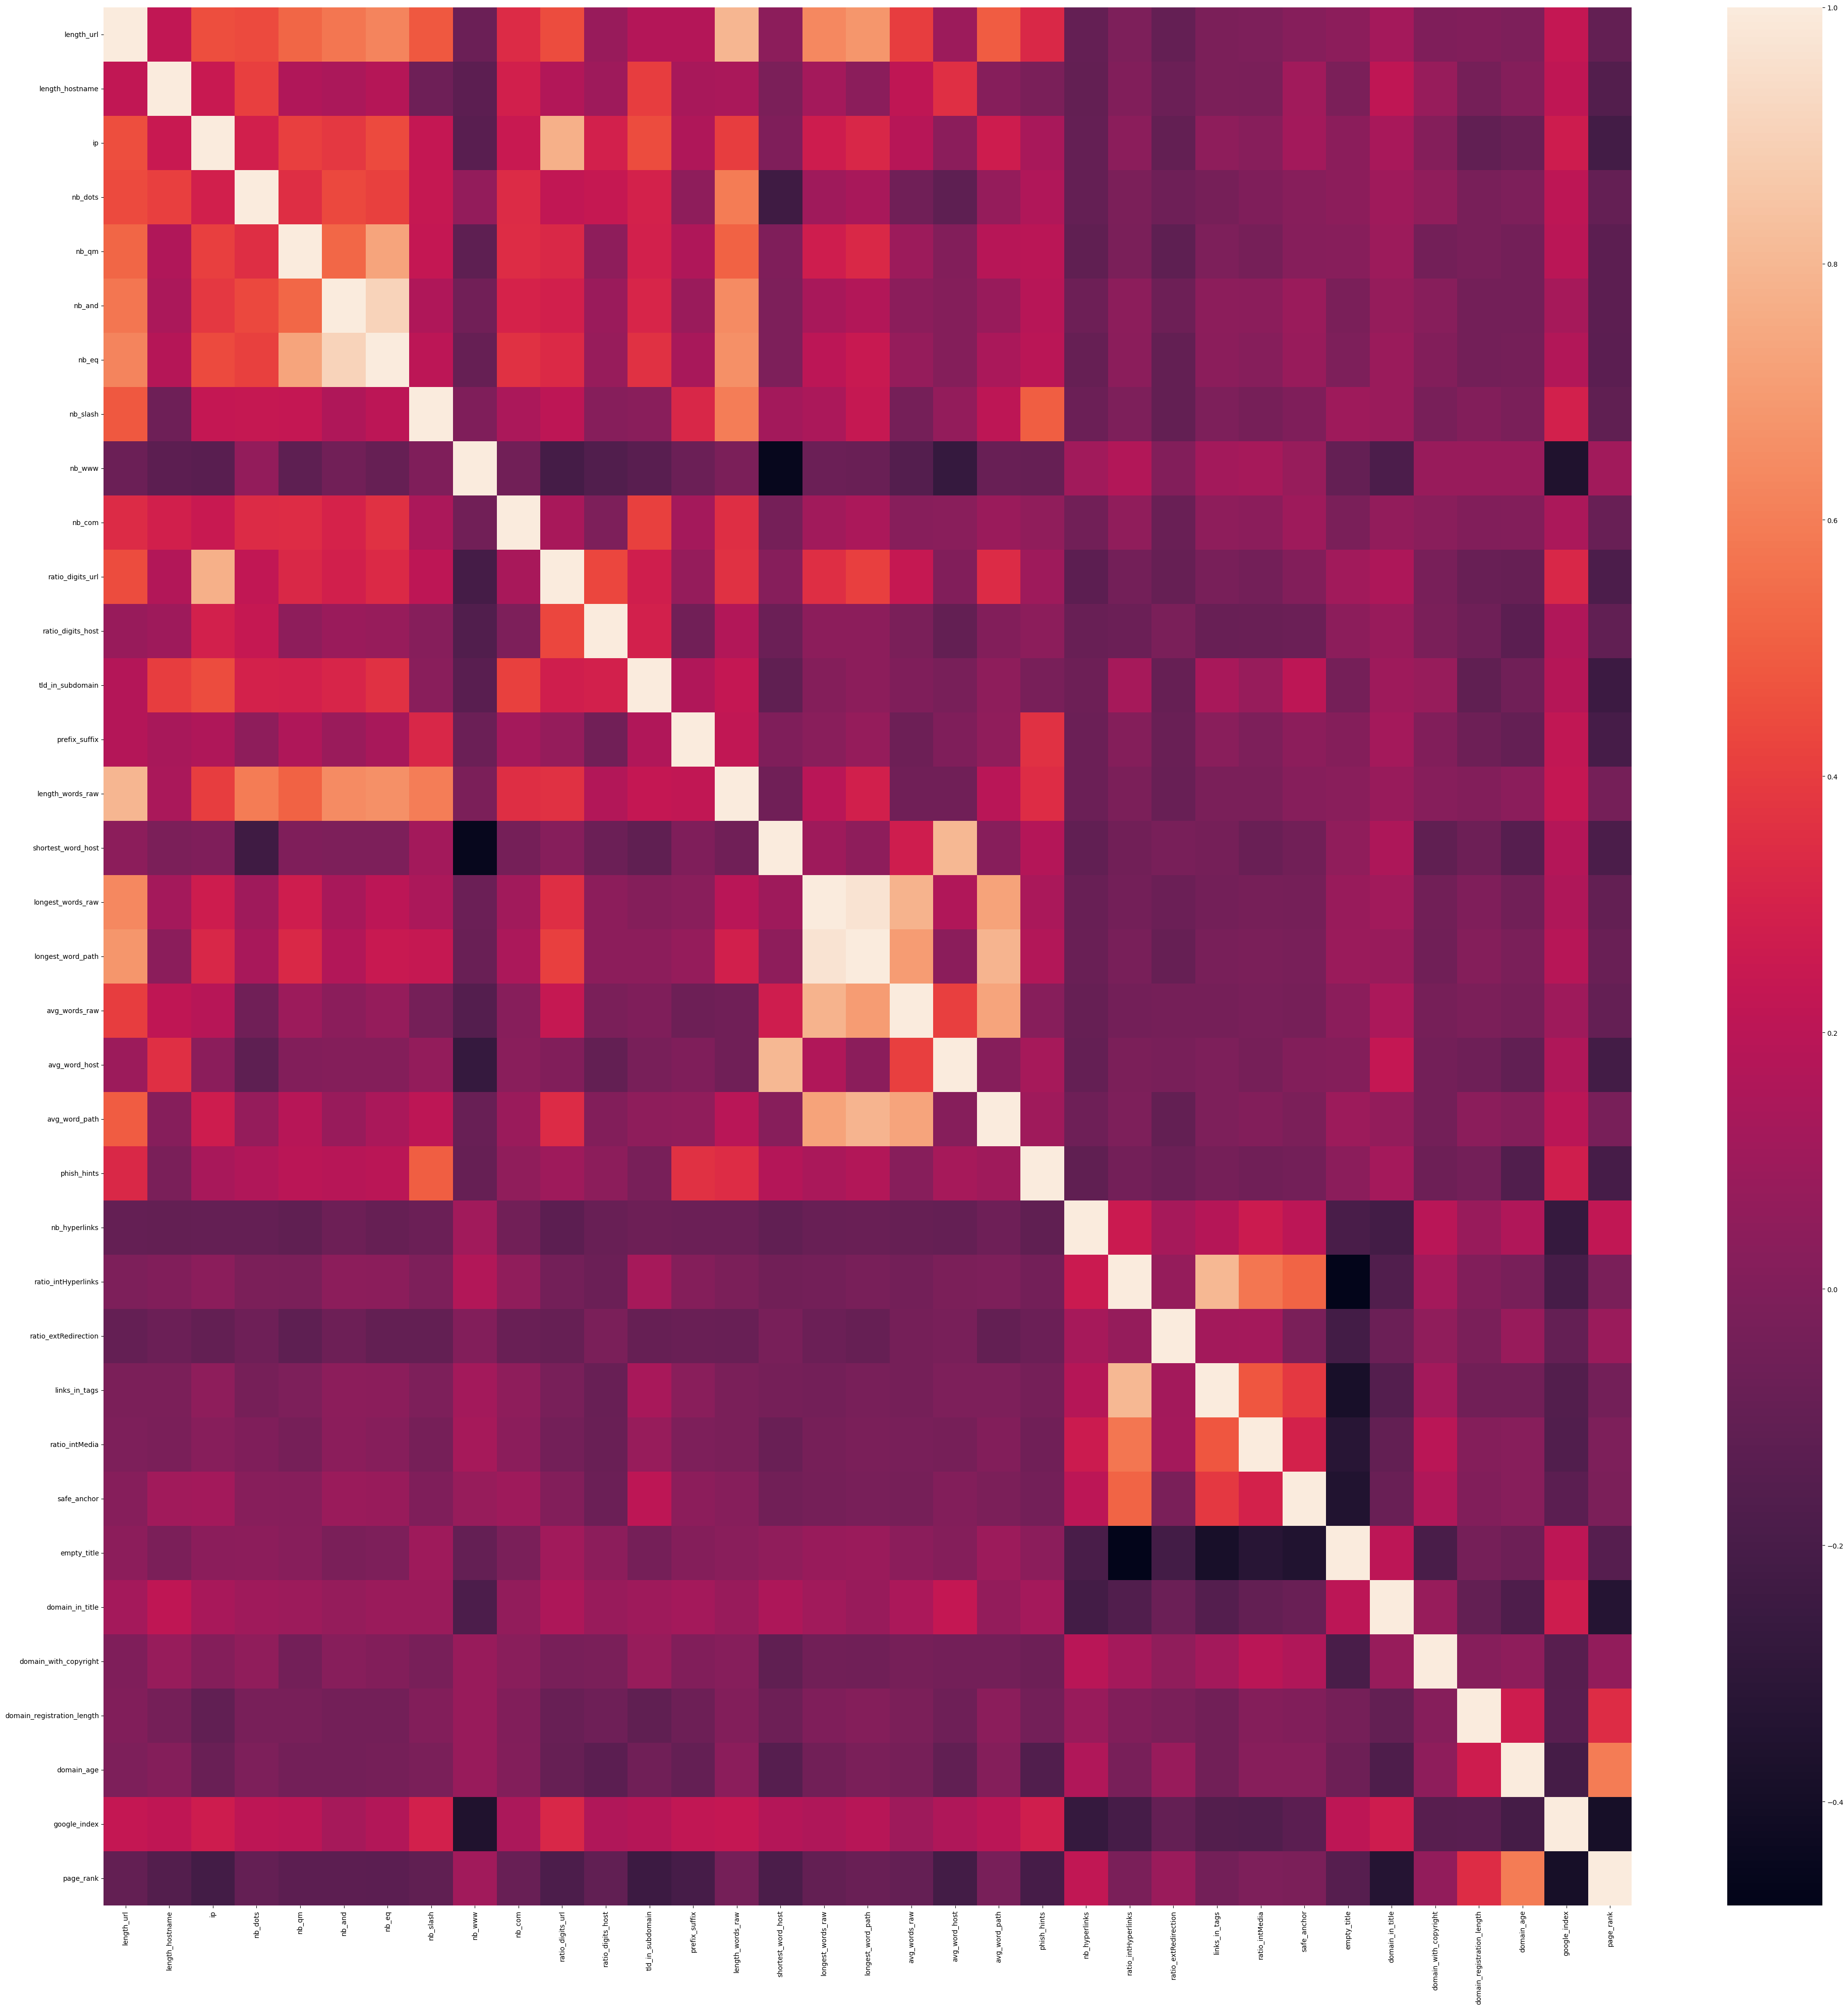

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
corr = df1.corr()
sns.heatmap(corr)